## Análise de Anomalia de Temperatura da Superfície do Mar (TSM)


1. **Instalação das bibliotecas necessárias**
   - matplotlib
   - pandas

In [10]:
#########################################################
#   AUTOR : REYNERTH COSTA                              #
#   INSTITUIÇÃO : UFPEL/FACULDADE DE METEOROLOGIA       #
#   ATUALIZAÇÃO: 2025/06/18                             #
#########################################################
# Antes de executar este script, instale as bibliotecas necessárias.
# Rode os seguintes comandos no terminal (linha de comando):
!pip install matplotlib   # Instalar o matplotlib (para criação de gráficos)
!pip install pandas       # Instalar o pandas (para manipulação de dados em tabelas)

2. **Importação das bibliotecas**
   - Leitura de dados
   - Plotagem de gráficos

In [11]:
# Importa as bibliotecas necessárias
import matplotlib.pyplot as plt  # Para criação de gráficos
import pandas as pd              # Para manipulação e análise de dados em tabelas 

In [12]:
# -----------------------------------------------------------
# Lendo o arquivo CSV com os dados de anomalia de TSM
# -----------------------------------------------------------
# Atenção: o caminho do arquivo varia dependendo do sistema operacional
# e de onde o arquivo CSV está salvo.

# EXEMPLOS DE COMO DEFINIR O CAMINHO DO ARQUIVO:

# Se estiver rodando no Google Colab:
# Primeiro, faça o upload do arquivo manualmente ou use:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('nino34.csv', sep=',')

# Se estiver usando Windows:
# df = pd.read_csv('C:\\Users\\SeuUsuario\\Documents\\nino34.csv', sep=',')

# Se estiver usando Linux (exemplo de caminho absoluto):
# df = pd.read_csv('/home/seu_usuario/CAM1_2023/nino34.csv', sep=',')

# Se estiver usando Mac (exemplo de caminho absoluto):
# df = pd.read_csv('/Users/seu_usuario/Documents/nino34.csv', sep=',')

# No exemplo abaixo, caminho usado para Linux:
# df = pd.read_csv('/home/rtk/CAM1_2023/nino34.csv', sep=',')

df  = pd.read_csv('nino34.csv', sep=',')

In [13]:
# Exibe o DataFrame carregado (opcional, útil apenas em modo interativo)
# print(df)
df

,YR,MON,TOTAL,ClimAdjust,ANOM
0,1950,1,24.56,26.18,-1.62
1,1950,2,25.07,26.39,-1.32
2,1950,3,25.88,26.95,-1.07
3,1950,4,26.29,27.39,-1.11
4,1950,5,26.19,27.56,-1.37
...,...,...,...,...,...
877,2023,2,26.30,26.76,-0.46
878,2023,3,27.19,27.29,-0.11
879,2023,4,27.96,27.83,0.14
880,2023,5,28.40,27.94,0.46


In [14]:
# -----------------------------------------------------------
# Processamento dos dados: separação de anomalias positivas e negativas
# -----------------------------------------------------------

# Cria uma lista com o número de meses (ou registros) disponíveis no DataFrame
meses = list(range(len(df)))

# Exibe as 5 primeiras posições da lista "meses" (útil para verificar o conteúdo)
print('Primeiros 5 valores da lista "meses":', meses[:5])

Primeiros 5 valores da lista "meses": [0, 1, 2, 3, 4]


In [15]:
# Inicializa duas listas para separar os valores positivos e negativos da anomalia de TSM
tsm_pos = list(range(len(df)))  # Lista para os valores positivos (ou zero)
tsm_neg = list(range(len(df)))  # Lista para os valores negativos (ou zero)

In [16]:
# Loop para separar os valores positivos e negativos
for n in range(len(df)):
    # Armazena apenas os valores positivos ou zero
    if df['ANOM'][n] >= 0:
        tsm_pos[n] = df['ANOM'][n]
    else:
        tsm_pos[n] = 0

    # Armazena apenas os valores negativos ou zero
    if df['ANOM'][n] <= 0:
        tsm_neg[n] = df['ANOM'][n]
    else:
        tsm_neg[n] = 0

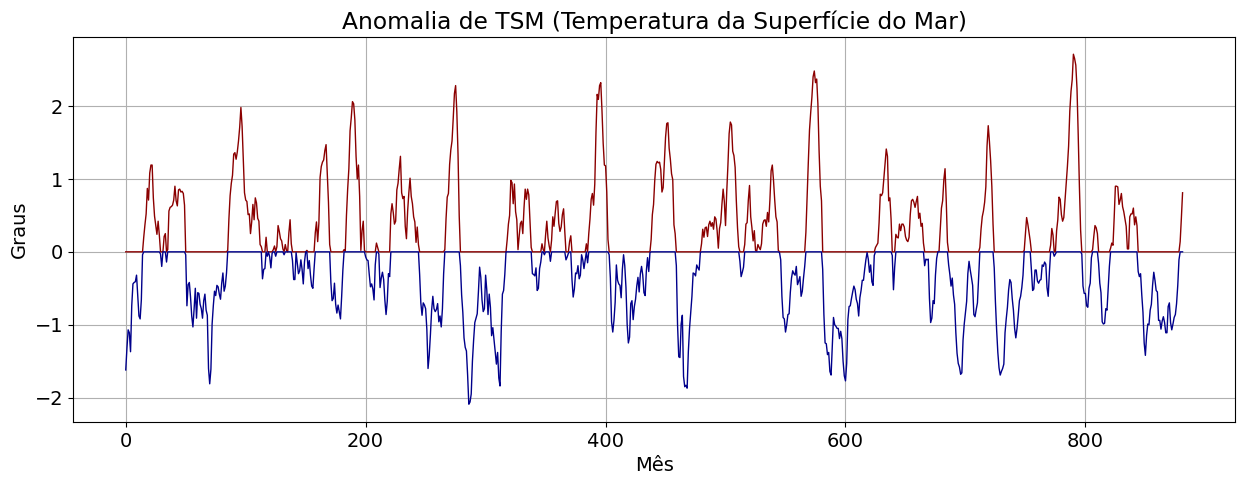

In [ ]:
# -----------------------------------------------------------
# Criação do gráfico
# -----------------------------------------------------------

# Inicia a criação do gráfico
plt.figure(figsize=(15, 5))  # Define o tamanho da figura (15 de largura por 5 de altura)
plt.rcParams.update({'font.size': 14})  # Ajusta o tamanho da fonte

# Plotagem das séries de dados
# Caso queira plotar a série original completa (sem separação entre positivos e negativos), descomente a linha abaixo:
# plt.plot(meses, df['ANOM'], color='darkred', lw=2, ls='-')


plt.plot(meses, tsm_pos, color='darkred', lw=1, ls='-')         # Plota a série de anomalias positivas (em vermelho escuro)
plt.plot(meses, tsm_neg, color='darkblue', lw=1, ls='-')        # Plota a série de anomalias negativas (em azul escuro)
plt.title('Anomalia de TSM (Temperatura da Superfície do Mar)') # Define o título do gráfico
plt.xlabel('Mês')                                               # Define o rótulo do eixo X
plt.ylabel('Graus')                                             # Define o rótulo do eixo Y
plt.grid()                                                      # Adiciona uma grade ao gráfico para facilitar a leitura
plt.show()                                                      # Exibe o gráfico